In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import yfinance as yf
import datetime as dt
import numpy as np

Desktop Edit

Laptop Edit

In [2]:
html = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = BeautifulSoup(html.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [3]:
stock_data = pd.read_html(str(table))[0]

In [30]:
delta_t = pd.tseries.offsets.BusinessDay(n = 21)
end_date = dt.date.today()
start_date = end_date - delta_t

In [31]:
names = [name.replace(".", "-") for name in stock_data.Symbol]

In [7]:
name_query = " ".join(names)

In [32]:
px = yf.download(name_query, start_date=start_date)

[*********************100%***********************]  503 of 503 completed


In [33]:
px_check = yf.download(name_query, start_date=start_date)

[*********************100%***********************]  503 of 503 completed


In [35]:
px_check.equals(px)

False

If we have to run a part of the script multiple times to check if correct, thats fine. Add it as a decorator

In [36]:
rets = px.pct_change(1)

Download chain, check if empty, Create DF with name and concat as rows

In [37]:
tickers = yf.Tickers(name_query)

opt_expiries = pd.DataFrame()
opt_chain = pd.DataFrame()

for name in names[:50]:
    
    tick = tickers.tickers[name]
    
    t_exp = pd.Series(tick.options, dtype=pd.StringDtype())
    
    if not t_exp.empty:
    
        for exp in t_exp:
            
            t_book = tick.option_chain(exp)
            t_calls = t_book.calls
            t_puts = t_book.puts
            
            t_calls['callput'] = 'call'
            t_puts['callput'] = 'put'
            
            t_chain = pd.concat([t_calls, t_puts])
            
            t_chain['expiry'] = exp
            t_chain['ticker'] = name
            t_chain['stock_px'] = px['Adj Close'][name].iloc[-1]
            t_chain['stock_ret'] = rets['Adj Close'][name].iloc[-1]
            
            t_chain.reset_index(drop=True, inplace=True)
            
            opt_chain = pd.concat([opt_chain, t_chain])
            
opt_chain.reset_index(drop=True, inplace=True)

/var/folders/05/w09j8mf92kjf1xyg7l27ww6c0000gn/T/ipykernel_16428/914806418.py:32: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  opt_chain = pd.concat([opt_chain, t_chain])
/var/folders/05/w09j8mf92kjf1xyg7l27ww6c0000gn/T/ipykernel_16428/914806418.py:23: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  t_chain = pd.concat([t_calls, t_puts])
/var/folders/05/w09j8mf92kjf1xyg7l27ww6c0000gn/T/ipykernel_16428/914806418.py:23: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these w

In [38]:
today_array = [dt.date.today().strftime('%Y-%m-%d') for x in opt_chain.index]

In [39]:
opt_chain['k_norm'] = opt_chain['strike'] / opt_chain['stock_px']
opt_chain['1d_delta'] = opt_chain['change'] / 100 / opt_chain['stock_ret']
opt_chain['t_exp'] = np.busday_count(today_array, [x for x in opt_chain['expiry']])

In [40]:
import numpy as np

gDaysInYear = 365.0  # .242
gSmall = 1e-12
gNotebookMode = False

INVROOT2PI = 0.3989422804014327

def n_vect(x):
    return N(x)

In [41]:
def N(x):
    """ Fast Normal CDF function based on Hull OFAODS  4th Edition Page 252.
    This function is accurate to 6 decimal places. """

    a1 = 0.319381530
    a2 = -0.356563782
    a3 = 1.781477937
    a4 = -1.821255978
    a5 = 1.330274429
    g = 0.2316419

    k = 1.0 / (1.0 + g * np.abs(x))
    k2 = k * k
    k3 = k2 * k
    k4 = k3 * k
    k5 = k4 * k

    if x >= 0.0:
        c = (a1 * k + a2 * k2 + a3 * k3 + a4 * k4 + a5 * k5)
        phi = 1.0 - c * np.exp(-x*x/2.0) * INVROOT2PI
    else:
        phi = 1.0 - N(-x)

    return phi

In [42]:
def bs_delta(s, t, k, r, q, v, p_c):
    """ Price a derivative using Black-Scholes model. """

    if p_c == 'call':
        phi = +1.0
    elif p_c == 'put':
        phi = -1.0

    k = np.maximum(k, gSmall)
    t = np.maximum(t, gSmall)
    v = np.maximum(v, gSmall)

    vsqrtT = v * np.sqrt(t)
    ss = s * np.exp(-q*t)
    kk = k * np.exp(-r*t)
    d1 = np.log(ss/kk) / vsqrtT + vsqrtT / 2.0
    delta = phi * np.exp(-q*t) * n_vect(phi * d1)
    return delta

In [43]:
opt_chain

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,contractSize,currency,callput,expiry,ticker,stock_px,stock_ret,k_norm,1d_delta,t_exp
0,MMM230120C00060000,2022-10-28 17:04:00+00:00,60.0,65.77,68.80,70.20,0.0,0.0,1.0,0.0,...,REGULAR,USD,call,2023-01-20,MMM,126.720001,0.030579,0.473485,0.0,9
1,MMM230120C00065000,2022-12-06 16:06:27+00:00,65.0,59.70,58.05,58.95,0.0,0.0,7.0,7.0,...,REGULAR,USD,call,2023-01-20,MMM,126.720001,0.030579,0.512942,0.0,9
2,MMM230120C00070000,2022-08-18 19:59:07+00:00,70.0,76.75,46.70,48.10,0.0,0.0,5.0,0.0,...,REGULAR,USD,call,2023-01-20,MMM,126.720001,0.030579,0.552399,0.0,9
3,MMM230120C00075000,2023-01-04 14:37:10+00:00,75.0,48.65,51.35,52.15,0.0,0.0,3.0,9.0,...,REGULAR,USD,call,2023-01-20,MMM,126.720001,0.030579,0.591856,0.0,9
4,MMM230120C00080000,2022-11-16 20:47:47+00:00,80.0,48.73,40.85,42.80,0.0,0.0,18.0,0.0,...,REGULAR,USD,call,2023-01-20,MMM,126.720001,0.030579,0.631313,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,AJG230721P00170000,2022-12-30 19:53:18+00:00,170.0,5.16,3.60,5.90,0.0,0.0,2.0,3.0,...,REGULAR,USD,put,2023-07-21,AJG,192.020004,0.029929,0.885324,0.0,139
27961,AJG230721P00180000,2022-12-15 19:29:02+00:00,180.0,8.70,5.80,7.90,0.0,0.0,NaN,3.0,...,REGULAR,USD,put,2023-07-21,AJG,192.020004,0.029929,0.937402,0.0,139
27962,AJG230721P00185000,2023-01-05 16:01:30+00:00,185.0,10.70,7.10,10.10,0.0,0.0,1.0,5.0,...,REGULAR,USD,put,2023-07-21,AJG,192.020004,0.029929,0.963441,0.0,139
27963,AJG230721P00195000,2023-01-05 20:46:00+00:00,195.0,15.60,11.20,14.10,0.0,0.0,2.0,5.0,...,REGULAR,USD,put,2023-07-21,AJG,192.020004,0.029929,1.015519,0.0,139


In [44]:
opt_chain.columns

Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask',
       'change', 'percentChange', 'volume', 'openInterest',
       'impliedVolatility', 'inTheMoney', 'contractSize', 'currency',
       'callput', 'expiry', 'ticker', 'stock_px', 'stock_ret', 'k_norm',
       '1d_delta', 't_exp'],
      dtype='object')

In [45]:
opt_chain['delta_calc'] = opt_chain.apply(lambda x: bs_delta(x.stock_px, x.t_exp/252, x.strike, 0, 0, x.impliedVolatility, x.callput), axis = 1)

In [119]:
names

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

In [122]:
ticks = ['AMZN', 'AAPL', 'YUM']

In [123]:
d_curve = opt_chain[(opt_chain['ticker'].isin(ticks)) & (opt_chain['expiry'] == '2023-03-17') & (opt_chain['callput'] == 'call')]

Have index of np range 0.75 to 1.25 in 0.01 gaps. we dont need to actually mark to market for an option

In [130]:
rebase_index = np.arange(0.75,1.26,0.01)
smaller_index = np.arange(0.9,1.11,0.01)

In [135]:
curves = pd.DataFrame()

curve_df = pd.DataFrame(columns = ticks, index = smaller_index)

for tick in ticks:
    
    t_curve = d_curve[d_curve['ticker'] == tick][['k_norm', 'delta_calc']].set_index('k_norm')

    interp_curve = pd.DataFrame(np.interp(smaller_index, t_curve.index, t_curve.delta_calc), index = smaller_index)

    curve_df[tick] = interp_curve

ValueError: array of sample points is empty

<AxesSubplot: >

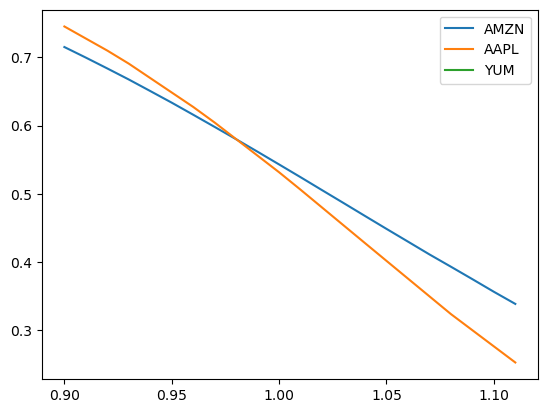

In [136]:
curve_df.plot()

,0
0.75,0.917959
0.76,0.916855
0.77,0.915752
0.78,0.914648
0.79,0.913545
0.80,0.912441
0.81,0.898796
0.82,0.882997
0.83,0.867197
0.84,0.851398


In [56]:
t_curve.resample(0.01)

ValueError: Invalid frequency: 0.01

<AxesSubplot: xlabel='k_norm'>

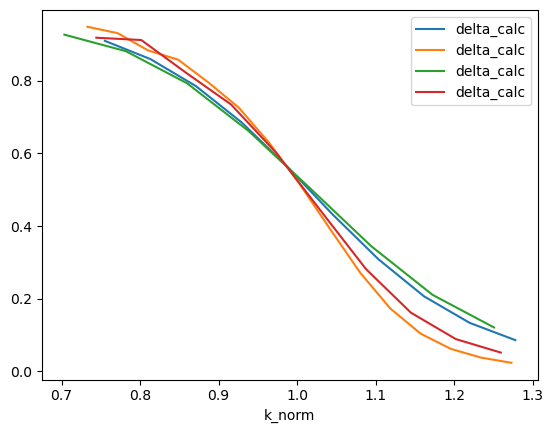

In [50]:
curves.plot()

In [51]:
curves

,delta_calc,delta_calc,delta_calc,delta_calc
k_norm,,,,
0.755112,0.909989,NaN,NaN,NaN
0.813197,0.859690,NaN,NaN,NaN
0.871283,0.785059,NaN,NaN,NaN
0.929368,0.685305,NaN,NaN,NaN
0.987454,0.563595,NaN,NaN,NaN
1.045539,0.431246,NaN,NaN,NaN
1.103625,0.308391,NaN,NaN,NaN
1.161710,0.206353,NaN,NaN,NaN
1.219796,0.133306,NaN,NaN,NaN
